In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
sigma1 = np.array([[30, 1], [1, 40]])
p1 = np.random.multivariate_normal(mean=[0, 0], cov=sigma1, size=20)
p2 = np.random.multivariate_normal(mean=[20, 0], cov=sigma1, size=20)

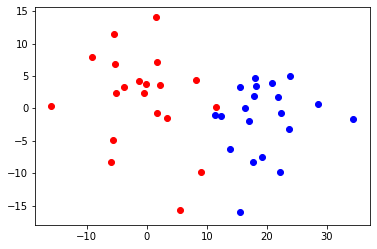

In [3]:
plt.scatter(p1[:,0], p1[:,1], color="r")
plt.scatter(p2[:,0], p2[:,1], color="b")

In [4]:
points = np.concatenate((p1, p2))
np.random.shuffle(points)

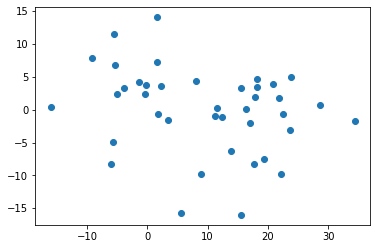

In [5]:
plt.scatter(points[:, 0], points[:, 1])

In [6]:
def distance(p1, p2):
    points = zip(p1, p2)
    distance = 0
    for item in points:
        distance += (item[0] - item[1])**2
    return distance**.5

In [7]:
def plot_current_clusters(points, groups):
    max_groups = np.max(groups)
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'cyan']
    
    clusters = [[] for _ in range(max_groups + 1)]
    for i, point in enumerate(points):
        clusters[groups[i]].append(point)
    for i in range(len(clusters)):
        clusters[i] = np.array(clusters[i])
    for i, cluster in enumerate(clusters):
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i])
    plt.pause(.1)

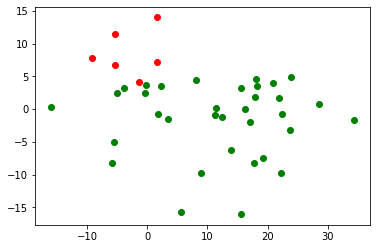

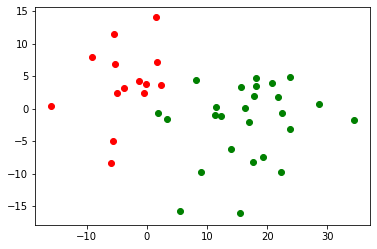

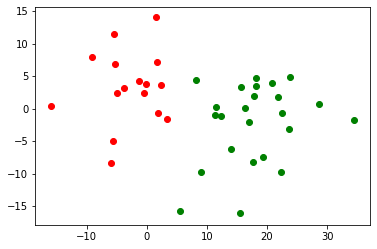

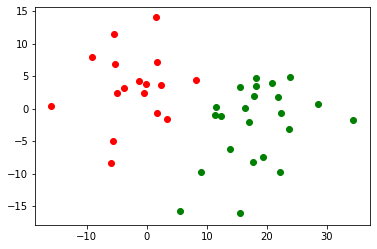

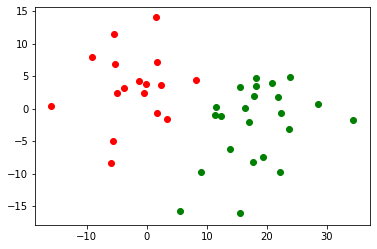

In [8]:
min_p = np.min(points)
max_p = np.max(points)
num_dim = 2
num_clusters = 2
cluster_centers = np.random.uniform(min_p, max_p, size=(2, 2))
groups = np.zeros(len(points), dtype=np.int)


# Main Loop:
iterate = 0
while True:
    need_to_break = True
    
    # Groups Points
    for i, point in enumerate(points):
        d = np.zeros(len(cluster_centers))
        for j, ch in enumerate(cluster_centers):
            d[j] = distance(point, ch)    
        # The Point Belongs to cluster number min_d:
        min_d = np.argmin(d)
        if groups[i] != min_d:
            need_to_break = False
            groups[i] = min_d

    # Calculate New Cluster Centers:
    cluster_centers = np.zeros((num_clusters, num_dim))
    for i in range(num_clusters):
        members = []
        for j in range(len(groups)):
            if groups[j] == i:
                members.append(points[j])
        members = np.array(members)
        cluster_centers[i, 0] = np.mean(members[:, 0])
        cluster_centers[i, 1] = np.mean(members[:, 1])

    plot_current_clusters(points, groups)
        
    if need_to_break:
        break

In [9]:
groups

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])